In [45]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [66]:
a = 0.06
points_1 = []
points_2 = []
N = 5
alphas = []

In [67]:
def points(N):
    for i in range(N):
        x_1 = np.random.uniform(0, 1)
        y_1 = np.random.uniform(0, 1)
        points_1.append((x_1, y_1))
        alpha_value = np.random.uniform(0, 2 * np.pi)
        alphas.append(alpha_value)

        x_2 = x_1 + a * np.cos(alpha_value)
        y_2 = y_1 + a * np.sin(alpha)

        points_2.append((x_2, y_2))

In [68]:
points(N)

In [69]:
points_1

[(0.42975173336916817, 0.8793497448646338),
 (0.6754074710298923, 0.8864112034521604),
 (0.06718112396362708, 0.9388411546240638),
 (0.8377131128062625, 0.30520229233972707),
 (0.21273569700458284, 0.6023702170312213)]

In [70]:
points_2

[(0.3698233903215796, 0.8822812461132347),
 (0.6776602670277003, 0.9463688961211771),
 (0.012689790586457195, 0.9639547881082519),
 (0.7819534242599181, 0.28304699651198717),
 (0.2717996276031689, 0.5918131292582882)]

In [71]:
def plot_lines(N):
    for i in range(N):
        plt.plot([points_1[i][0], points_2[i][0]], [points_1[i][1], points_2[i][1]], 'r')
    plt.show()

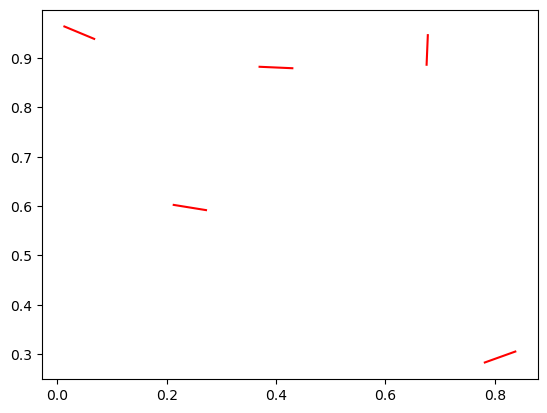

In [72]:
plot_lines(N)

In [73]:
import matplotlib.pyplot as plt

def plot_lines(N):
    # Define custom colors
    line_color = 'steelblue'
    marker_color = 'none'

    # Define marker style for data points
    marker_style = 'o'
    marker_size = 8

    # Calculate plot limits
    x_min = min(min(points_1[i][0], points_2[i][0]) for i in range(N))
    x_max = max(max(points_1[i][0], points_2[i][0]) for i in range(N))
    y_min = min(min(points_1[i][1], points_2[i][1]) for i in range(N))
    y_max = max(max(points_1[i][1], points_2[i][1]) for i in range(N))

    # Set figure size
    plt.figure(figsize=(8, 6))

    for i in range(N):
        # Plot lines between points
        plt.plot([points_1[i][0], points_2[i][0]], [points_1[i][1], points_2[i][1]], linestyle='-', color=line_color)

        # Plot data points without markers
        plt.scatter(points_1[i][0], points_1[i][1], marker=marker_style, s=marker_size, color=marker_color)
        plt.scatter(points_2[i][0], points_2[i][1], marker=marker_style, s=marker_size, color=marker_color)

    # Customize grid
    plt.grid(True, linestyle='dotted', linewidth=0.5, color='gray')

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Lines between Points')

    # Adjust plot limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Display the plot
    plt.show()


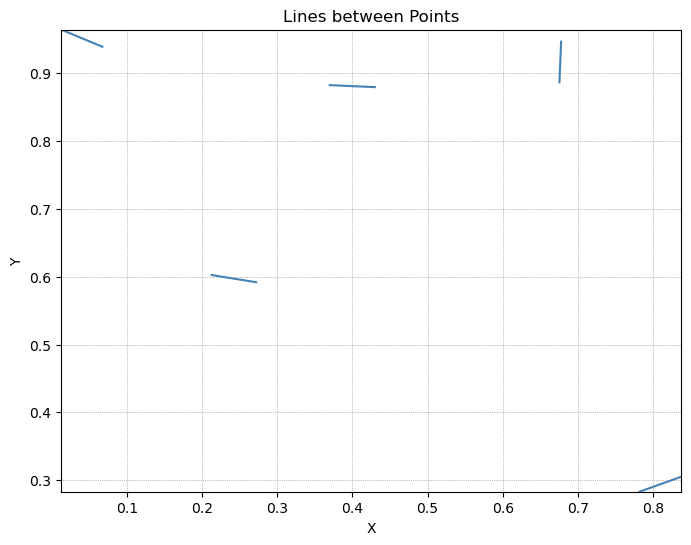

In [74]:
plot_lines(N)

In [75]:
import matplotlib.pyplot as plt

def plot_lines(N):
    # Define custom colors
    line_color = 'steelblue'
    marker_color = 'none'

    # Define marker style for data points
    marker_style = 'o'
    marker_size = 8

    # Calculate plot limits with buffer space
    x_min = min(min(points_1[i][0], points_2[i][0]) for i in range(N))
    x_max = max(max(points_1[i][0], points_2[i][0]) for i in range(N))
    y_min = min(min(points_1[i][1], points_2[i][1]) for i in range(N))
    y_max = max(max(points_1[i][1], points_2[i][1]) for i in range(N))

    x_buffer = (x_max - x_min) * 0.1  # 10% buffer
    y_buffer = (y_max - y_min) * 0.1  # 10% buffer

    x_min -= x_buffer
    x_max += x_buffer
    y_min -= y_buffer
    y_max += y_buffer

    # Set figure size
    plt.figure(figsize=(8, 6))

    for i in range(N):
        # Plot lines between points
        plt.plot([points_1[i][0], points_2[i][0]], [points_1[i][1], points_2[i][1]], linestyle='-', color=line_color)

        # Plot data points without markers
        plt.scatter(points_1[i][0], points_1[i][1], marker=marker_style, s=marker_size, color=marker_color)
        plt.scatter(points_2[i][0], points_2[i][1], marker=marker_style, s=marker_size, color=marker_color)

    # Customize grid
    plt.grid(True, linestyle='dotted', linewidth=0.5, color='gray')

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Lines between Points')

    # Adjust plot limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Display the plot
    plt.show()


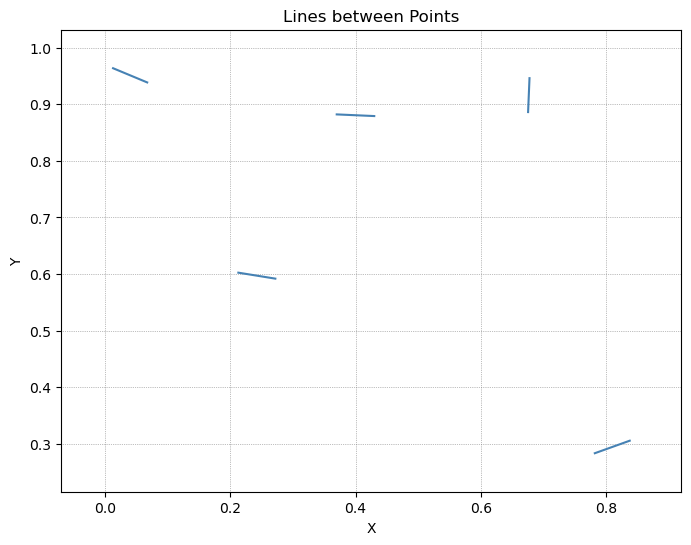

In [76]:
plot_lines(N)

In [77]:
import matplotlib.pyplot as plt

def plot_lines(N):
    # Set figure size
    plt.figure(figsize=(8, 6))

    for i in range(N):
        # Plot lines between points
        plt.plot([points_1[i][0], points_2[i][0]], [points_1[i][1], points_2[i][1]], 'steelblue')

    # Customize grid
    plt.grid(True, linestyle='dotted', linewidth=0.5, color='gray')

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Lines between Points')

    # Display the plot
    plt.show()

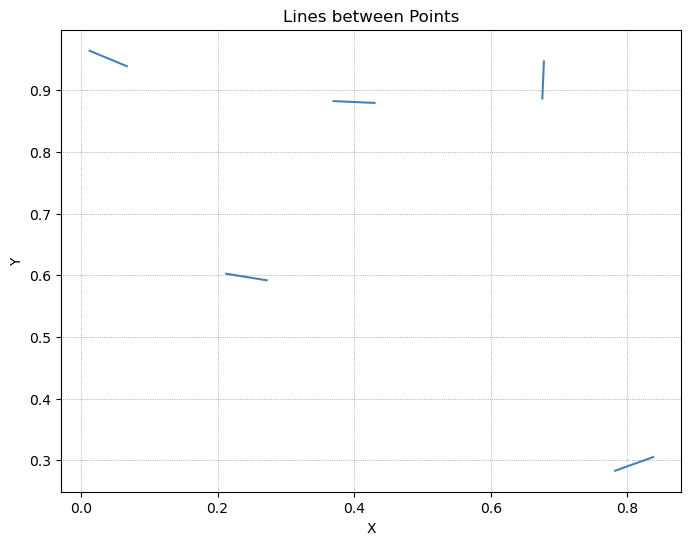

In [78]:
plot_lines(N)

In [85]:
def find_intersection_points(points, angles):
    intersections = []
    for i in range(len(points)-1):
        x1, y1 = points[i]
        theta1 = angles[i]
        for j in range(i+1, len(points)):
            x2, y2 = points[j]
            theta2 = angles[j]
            theta = theta1 - theta2
            x = x2 - x1
            y = y2 - y1
            intersection_x = x1 + x * math.cos(theta) - y * math.sin(theta)
            intersection_y = y1 + x * math.sin(theta) + y * math.cos(theta)
            intersections.append((intersection_x, intersection_y))
    return intersections

# Example usage:
import math

def find_intersection_points(points, angles):
    intersections = []
    for i in range(len(points)-1):
        x1, y1 = points[i]
        theta1 = angles[i]
        for j in range(i+1, len(points)):
            x2, y2 = points[j]
            theta2 = angles[j]
            theta = theta1 - theta2
            x = x2 - x1
            y = y2 - y1
            intersection_x = x1 + x * math.cos(theta) - y * math.sin(theta)
            intersection_y = y1 + x * math.sin(theta) + y * math.cos(theta)
            intersections.append((intersection_x, intersection_y))
    return intersections

intersection_points = find_intersection_points(points_1, alphas)
print("Intersection points:", intersection_points)


Intersection points: [(0.02277248369913365, 5.022516093578171), (4.215465485427359, 8.204969998268973), (6.614860096253802, 3.9218039709683774)]
